In [1]:
!pip install ./torch_phasecong/ ./torch_mi/ ./torch_crosscorr/ ./torch_hog/  ./torch_hilbert/ 

Processing ./torch_phasecong
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Processing ./torch_mi
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Processing ./torch_crosscorr
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Processing ./torch_hog
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Processing ./torch_hilbert
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pypro

# Load data


In [2]:
!pip install -q torchvision requests matplotlib
import tempfile
import torchvision
import torch.nn.functional as F
import requests
import torch

import matplotlib.pyplot as plt
with tempfile.NamedTemporaryFile() as fp:
    fp.write(requests.get("https://upload.wikimedia.org/wikipedia/commons/a/ab/Mandrill-k-means.png").content)
    im = F.interpolate((torchvision.io.read_image(fp.name, torchvision.io.ImageReadMode.RGB).unsqueeze(0)
    .to(torch.float64)
    .div(255)), size=(256, 256), mode='bicubic', align_corners=False)


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
import torch_phasecong

In [4]:
phaseCong = torch_phasecong.phasecong(im[0, 0])

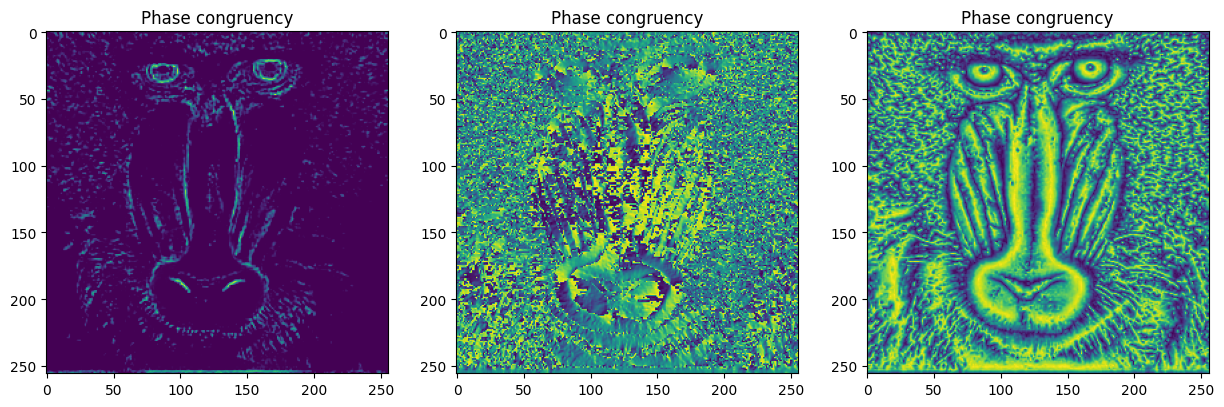

In [5]:
fig, axes = plt.subplots(1, len(phaseCong) - 1, figsize=(15, 5))
for pc, ax in zip(phaseCong[:-1], axes.flat):
    ax.imshow(pc)
    ax.title.set_text(f"Phase congruency")

In [9]:
import torch_hilbert

im.shape

torch.Size([1, 3, 256, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


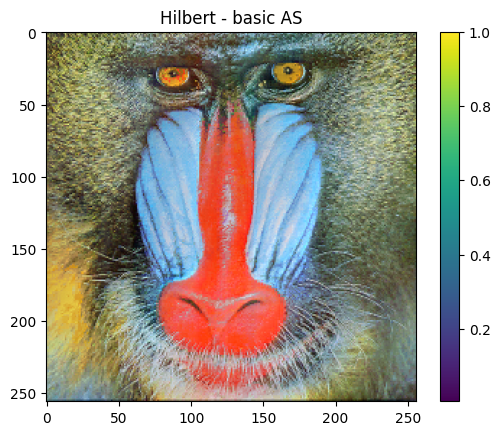

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


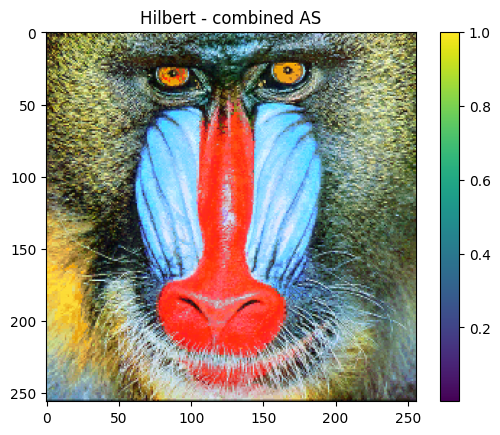

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


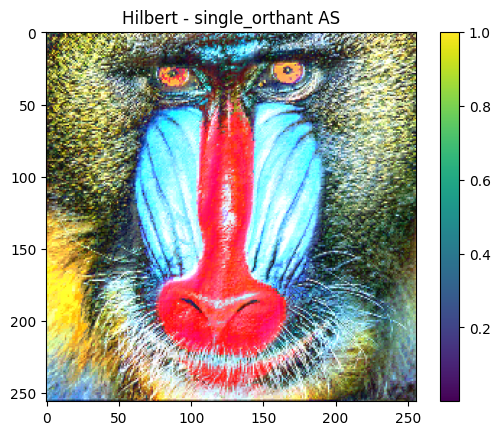

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


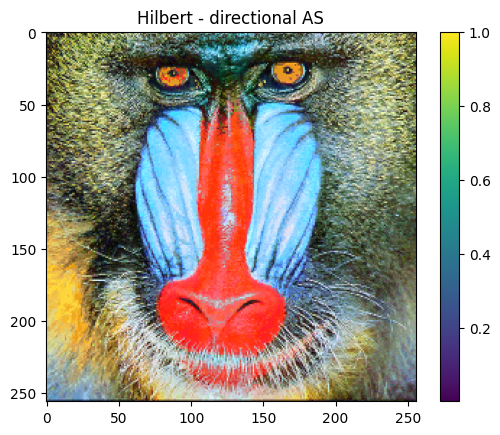

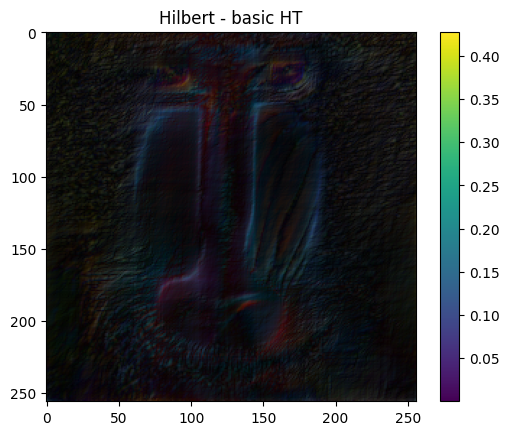

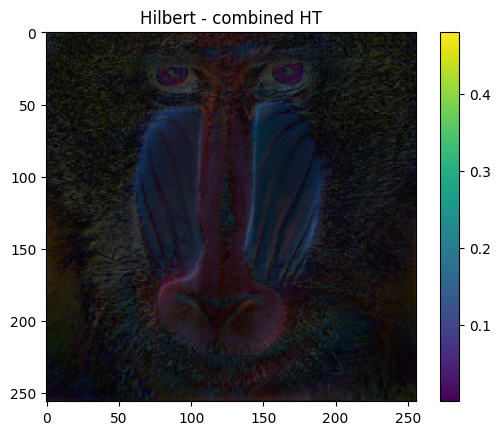

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


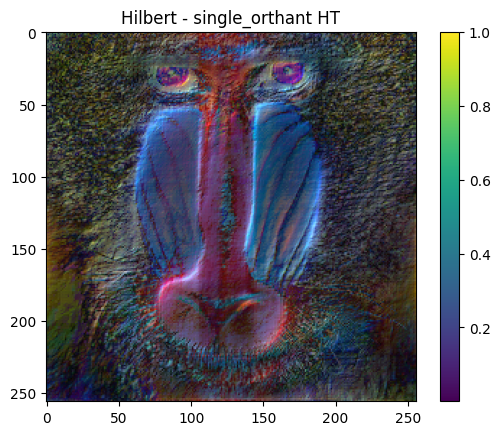

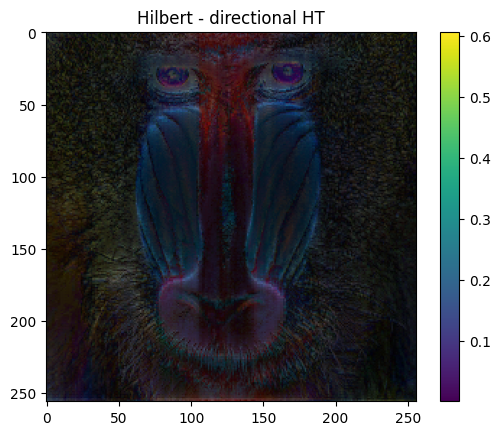

In [14]:
for mode in ["AS", "HT"]:
    for method in ["basic", "combined", "single_orthant", "directional"]:
        plt.imshow(
            torch_hilbert.HilbertTransformations(method, mode)(im)
            .abs()[0]
            .moveaxis(0, -1)
        )
        plt.title(f"Hilbert - {method} {mode}")
        plt.colorbar()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Auto-correlation')

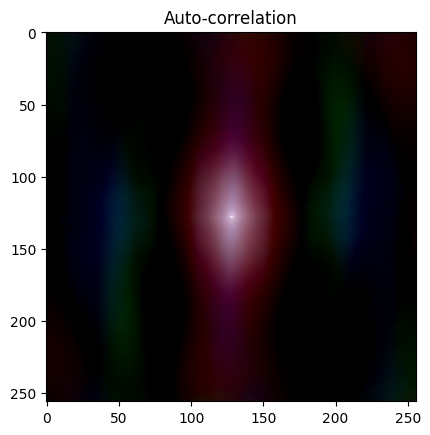

In [22]:
import torch_crosscorr

plt.imshow(
    torch_crosscorr.FastNormalizedCrossCorrelation("ncorr", "fft")(im, im)[
        0
    ].moveaxis(0, -1)
)
plt.title("Auto-correlation")

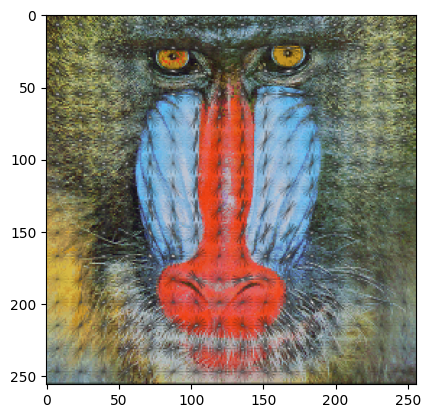

In [37]:
import torch_hog

torch_hog.HOG().plotVisualize(im, orthogonal=True)